<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Human_vs_AI_Text/blob/main/AI_vs_human_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Import the dataset

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Enhanzer-Task/Human VS AI Generated Text/archive/AI_Human.csv')

Check basic structure and datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [12]:
df.describe()


,generated,text_length
count,487235.000000,487235.000000
mean,0.372383,2269.586592
std,0.483440,988.814028
min,0.000000,1.000000
25%,0.000000,1583.000000
50%,0.000000,2102.000000
75%,1.000000,2724.000000
max,1.000000,18322.000000


In [4]:
df.isnull().sum()

,0
text,0
generated,0


Check label distribution

In [5]:
df['generated'].value_counts()

,count
generated,
0.0,305797
1.0,181438


In [6]:
df['generated'].value_counts(normalize=True)

,proportion
generated,
0.0,0.627617
1.0,0.372383


Text length analysis

In [7]:
df['text_length'] = df['text'].str.len()

In [8]:
df['text_length'].describe()

,text_length
count,487235.000000
mean,2269.586592
std,988.814028
min,1.000000
25%,1583.000000
50%,2102.000000
75%,2724.000000
max,18322.000000


Check duplicate entries

In [9]:
df.duplicated().sum()

np.int64(0)

Visualize the balance between human and AI-generated texts.

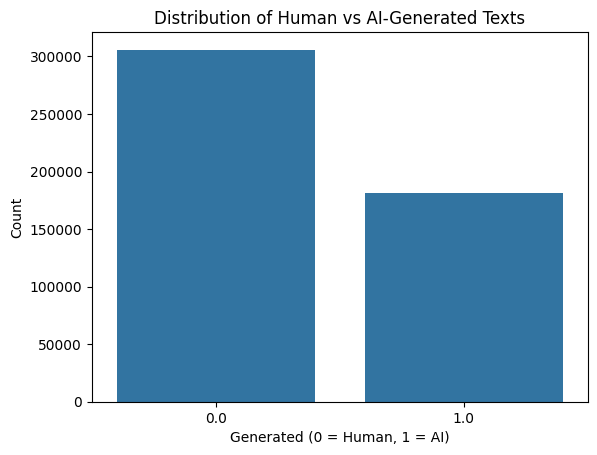

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='generated')
plt.title('Distribution of Human vs AI-Generated Texts')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Count')
plt.show()

Analyze the distribution of text lengths to detect outliers or differences between classes.

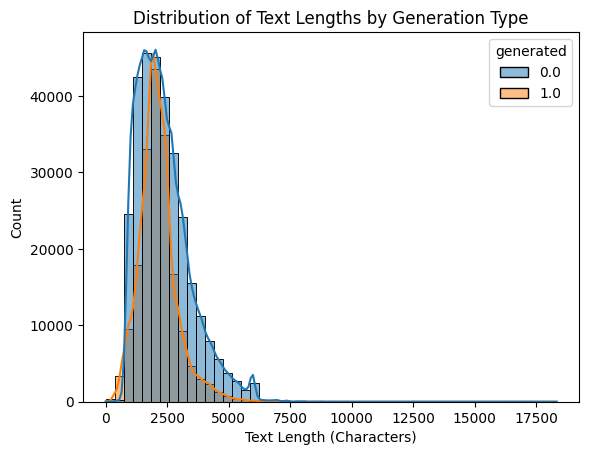

In [14]:
df['text_length'] = df['text'].str.len()
sns.histplot(data=df, x='text_length', hue='generated', bins=50, kde=True)
plt.title('Distribution of Text Lengths by Generation Type')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Count')
plt.show()

Compare text length statistics (median, quartiles, outliers) across human and AI texts.

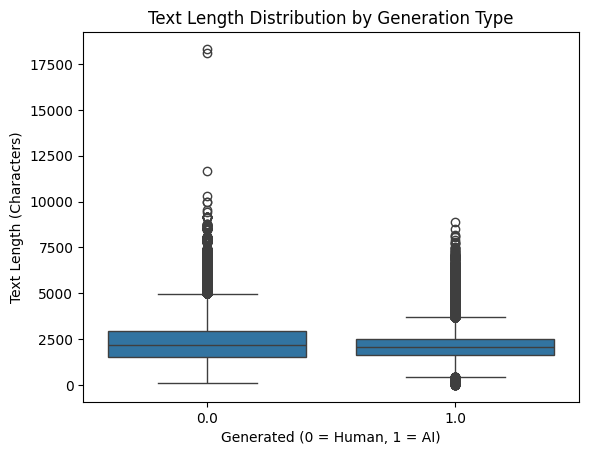

In [15]:
sns.boxplot(data=df, x='generated', y='text_length')
plt.title('Text Length Distribution by Generation Type')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Text Length (Characters)')
plt.show()

Summarize average text length differences between human and AI texts.

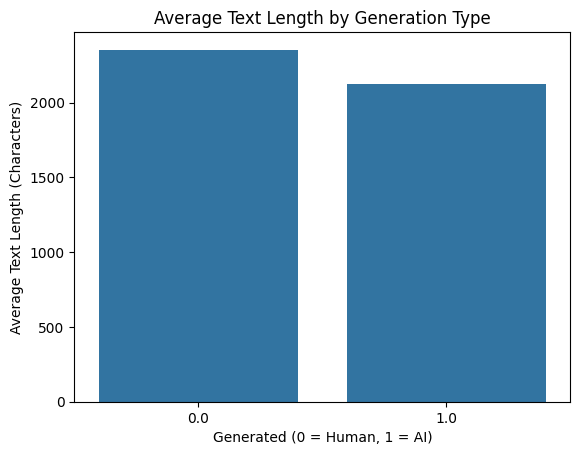

In [16]:
avg_length = df.groupby('generated')['text_length'].mean().reset_index()
sns.barplot(data=avg_length, x='generated', y='text_length')
plt.title('Average Text Length by Generation Type')
plt.xlabel('Generated (0 = Human, 1 = AI)')
plt.ylabel('Average Text Length (Characters)')
plt.show()